In [18]:
from IPython.core.display import HTML
HTML("""
<style>
.int {
    padding:10px 0px 0px 30px;
}
dd {
    margin: 0px 0px 15px 0px;
}
dt {
   color:blue;
}
</style>
""")

# Overview

# Background

## Definitions

<br/>
<dl>
    <dt>Charge (Q)</dt>
    <dd>The total charge in a battery available for driving a load. Charge is defined as<br/>
        <div class="int">
        $
        \begin{align}
            Q \triangleq\int_0^T i(t)\,dx
         \end{align}
        $
        </div>
        <br/>where <i>i</i> = discharge current and <i>T</i> = discharge time.
    <dt>Normalized Discharge Current (<i>i<sub>N</sub></i>)</dt>
    <dd>The ratio of discharge current to battery capacity, which we can express as
         <div class="int">
        $
        \begin{align}
            i_N\triangleq\frac{i}{Q}
         \end{align}
        $
        </div>
    <br/>where <i>i</i> = discharge current and <i>Q</i> = total battery charge.</dd>
    <dt>State of Charge (SOC)</dt>
    <dd>The percentage of total charge remaining in the battery.</dd>
 </dl>   

## Battery Discharge Basics

# Analysis 

In [19]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib.dates import HourLocator, MonthLocator, YearLocator
import seaborn as sns


In [20]:
iDischarge = 0.42
vTerm=4.20

C:\Users\Mark\AppData\Local\Temp\ipykernel_20692\920899745.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCC = dfFirst.append(dfCC, ignore_index=True)
C:\Users\Mark\AppData\Local\Temp\ipykernel_20692\920899745.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='grey', linewidth=0.35)
C:\Users\Mark\AppData\Local\Temp\ipykernel_20692\920899745.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='black', linewidth=0.5)


       time   voltage
0  0.000000  4.200000
1  0.005556  4.182107
2  0.013931  4.179587
3  0.022304  4.178155
4  0.030681  4.176981
           time   voltage
2956  24.735163  3.014734
2957  24.743531  3.010026
2958  24.751897  3.005248
2959  24.760266  3.000364
2960  24.768639  2.995426


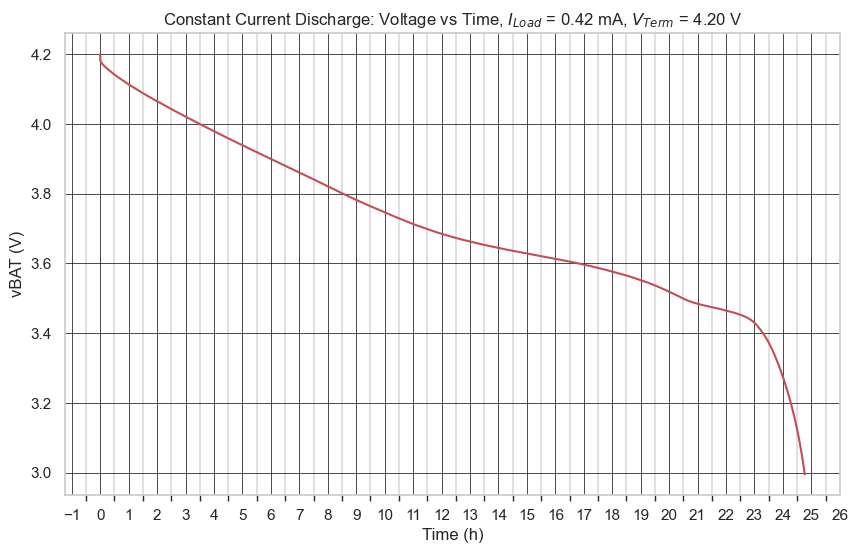

In [21]:
#  Import the CC Data
dfCC = pd.read_csv("../Data/CC_Portion_Discharge.csv")
dfCC['time'] = pd.to_datetime(dfCC['time'])  # Convert datestring string
minTime = dfCC["time"].min()+ datetime.timedelta(0,-20)
dfFirst = pd.DataFrame({'time':[minTime], 'voltage':[vTerm]})
dfCC = dfFirst.append(dfCC, ignore_index=True)
dfCC.time = dfCC.time-minTime     # Convert time to an interval
dfCC.time = dfCC.time/np.timedelta64(1, 'h') # Convert datetime to numerical hours
print(dfCC.head())
print(dfCC.tail())

# Graph the data
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator
sns.set(font_scale=1.0, style="whitegrid")   # My standard for jupyter notebook plots
fig, ax = plt.subplots(figsize=(10,6))       # This is my standard size for jupyter notebooks
ax.plot(dfCC.time,dfCC.voltage, color='r',marker = '', linestyle ='-')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(axis='x', which='minor', bottom=True)
ax.tick_params(axis='y', which='minor', left=True)
ax.grid(b=True, which='minor', color='grey', linewidth=0.35)
ax.grid(b=True, which='major', color='black', linewidth=0.5)
ax.set_xlabel('Time (h)') 
ax.set_ylabel('vBAT (V)')
ax.set_title('Constant Current Discharge: Voltage vs Time, $I_{Load}$ = %.2f mA, $V_{Term}$ = %.2f V'%(iDischarge,vTerm))
plt.show()

C:\Users\Mark\AppData\Local\Temp\ipykernel_20692\753050312.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCC1 = dfCC.append(zz,ignore_index=True)
C:\Users\Mark\AppData\Local\Temp\ipykernel_20692\753050312.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='grey', linewidth=0.35)
C:\Users\Mark\AppData\Local\Temp\ipykernel_20692\753050312.py:38: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='black', linewidth=0.5)


***************** Discharge Metrics *****************
The discharge current is 0.42 mA
The discharge capacity is 10.40 mAh
The discharge time is 24.76 hours

***************** Dataframe Tail *****************
                    time   voltage       SOC
2956           24.735163  3.014734  0.001039
2957           24.743531  3.010026  0.000701
2958           24.751897  3.005248  0.000363
2959           24.760266  3.000364  0.000025
2961  24.760883079817404  3.000000       0.0

***************** Dataframe Head *****************
       time   voltage       SOC
0       0.0  4.200000       1.0
1  0.005556  4.182107  0.999776
2  0.013931  4.179587  0.999437
3  0.022304  4.178155  0.999099
4  0.030681  4.176981  0.998761


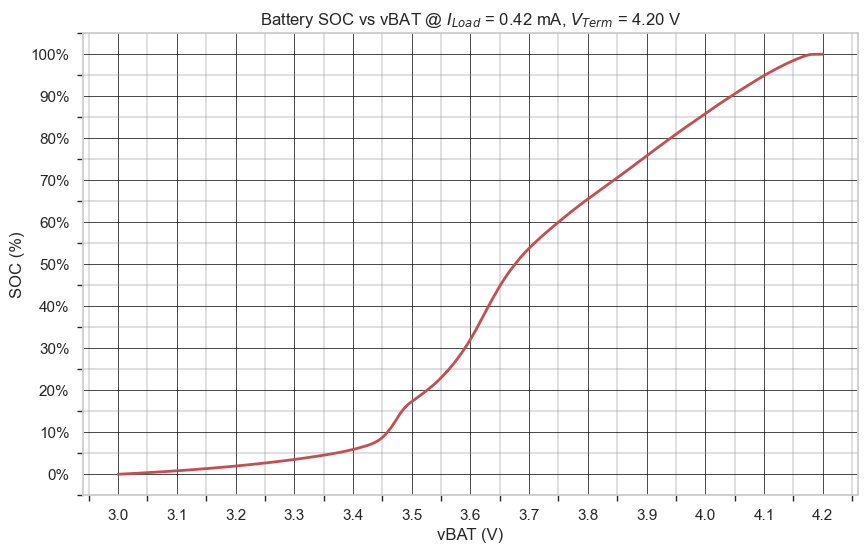

In [22]:
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline
#print(dfCC.tail())

# Charge transferred during the CC phase

interpolate_x = 3.0                                # Find the time value when the battery is fully discharged
y_interp = interp1d(dfCC['voltage'], dfCC['time']) # Create interpolation object
tCritical =y_interp(interpolate_x)
Q_CC = tCritical*iDischarge          # Charge transferred will be normalized to this value
zz = pd.DataFrame({'time':[tCritical],'voltage':[3.0]})
dfCC1 = dfCC.append(zz,ignore_index=True)
dfCC1 = dfCC1[dfCC1['voltage']>=interpolate_x]
dfCC1['SOC'] = 1-iDischarge*dfCC1['time']/Q_CC
# Print out some data 
print(f'***************** Discharge Metrics *****************')
print(f'The discharge current is {iDischarge:.2f} mA')
print(f'The discharge capacity is {Q_CC:.2f} mAh')
print(f'The discharge time is {tCritical:.2f} hours\n')
print(f'***************** Dataframe Tail *****************')      
print(dfCC1.tail())
print(f'\n***************** Dataframe Head *****************')      
print(dfCC1.head())

# Plot the SOC

sns.set(font_scale=1.0, style="whitegrid")   # My standard for jupyter notebook plots
fig, ax = plt.subplots(figsize=(10,6))       # This is my standard size for jupyter notebooks
ax.plot(dfCC1['voltage'],dfCC1['SOC']*100, color='r',marker = '', linestyle ='-',linewidth=2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.tick_params(axis='x', which='minor', bottom=True)
ax.tick_params(axis='y', which='minor', left=True)
ax.grid(b=True, which='minor', color='grey', linewidth=0.35)
ax.grid(b=True, which='major', color='black', linewidth=0.5)
ax.set_xlabel('vBAT (V)') 
ax.set_ylabel('SOC (%)')
ax.set_title('Battery SOC vs vBAT @ $I_{Load}$ = %.2f mA, $V_{Term}$ = %.2f V'%(iDischarge,vTerm))
plt.show()


In [23]:
from scipy import interpolate
y = np.linspace(0, 100, num=101, endpoint=True)/100
iObject = interpolate.interp1d(dfCC1.SOC,dfCC1.voltage)
SOCnew = iObject(y)
lookup = pd.DataFrame({'SOC':y*100, 'voltage':SOCnew})
lookup.head()
lookup.tail()
lookup.to_csv('../Output/Discharge_SOC_4_20.csv', index=False)